# Figures

This notebook contains the code snippets that were used to generate many of the figures in the slides.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_sunshine():
    return pd.read_csv(
        "../datasets/sunshine/sunshine.csv.gz", 
        names=['ns', 'timestamp', 'volts'], 
        index_col='timestamp', 
        parse_dates=True, 
        header=0,
        usecols=['timestamp', 'volts'],
    )


def load_ekg():
    return pd.read_csv(
        "../datasets/ekg/ekg.csv.gz", 
        names=['ns', 'timestamp', 'ekg'], 
        index_col='timestamp', 
        parse_dates=True, 
        header=0,
        usecols=['timestamp', 'ekg'],
    )


def load_retail():
    df = pd.read_csv(
        "../datasets/retail/sales.csv.gz", 
        names=['store', 'dept', 'date', 'sales', 'holiday'], 
        index_col='date', 
        parse_dates=True, 
        header=0,
        usecols=['date', 'dept', 'store', 'sales'],
    )

    return df.groupby(['date', 'store'])['sales'].sum().unstack()


def load_stocks():
    df = pd.read_csv(
        "../datasets/stocks/all_stocks.csv.gz", 
        names=['date', 'open', 'high', 'low', 'close', 'volume', 'name'], 
        index_col='date', 
        parse_dates=True, 
        header=0,
    )

    df = df.pivot(columns='name')
    return df


def load_energy():
    return pd.read_csv(
        "../datasets/energy/nyc_energy.csv.gz", 
        names=['timestamp', 'demand', 'precip', 'temp'], 
        index_col='timestamp', 
        parse_dates=True, 
        header=0,
    )


def load_occupancy():
    df = pd.read_csv(
        "../datasets/occupancy/training.csv.gz", 
        names=['id', 'timestamp', 'temp', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy'], 
        index_col='timestamp', 
        parse_dates=True, 
        header=0,
        usecols=['timestamp', 'temp', 'humidity', 'light', 'co2', 'occupancy'],
    )

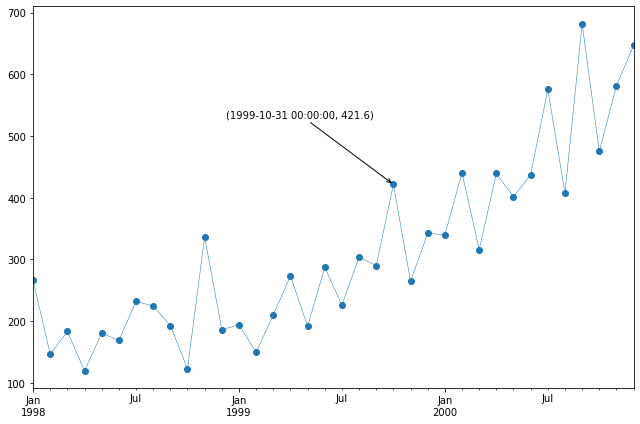

In [13]:
def time_point_data(saveto="01_timeseries_points.png"):
    values = [266.0, 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287.0, 226.0, 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3, 646.9]
    months = pd.date_range(start='1998-01', periods=len(values), freq='M')
    series = pd.Series(np.asarray(values), index=months, name="Shampoo Sales")
    
    fig, ax = plt.subplots(figsize=(9,6))
    series.plot(ax=ax, marker='o', linewidth=0.5)
    
    month = months[21]
    value = values[21]
    
    ax.annotate(f'({month}, {value})',
        xy=(month, value), xycoords='data',
        xytext=(-20, 75), textcoords='offset points',
        arrowprops=dict(arrowstyle="->"),
        horizontalalignment='right', verticalalignment='top'
    )
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
time_point_data()

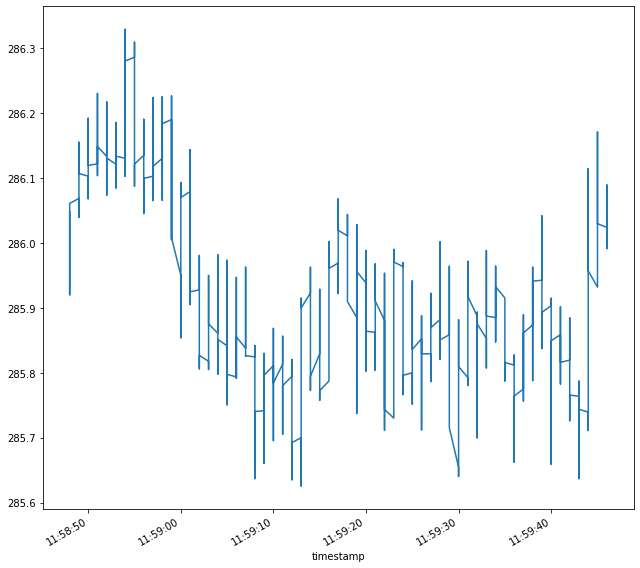

In [17]:
def time_series_characteristics(saveto="02_timeseries_characteristics.png"):
    fig, ax = plt.subplots(figsize=(9,8))
    # TODO    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
time_series_characteristics()

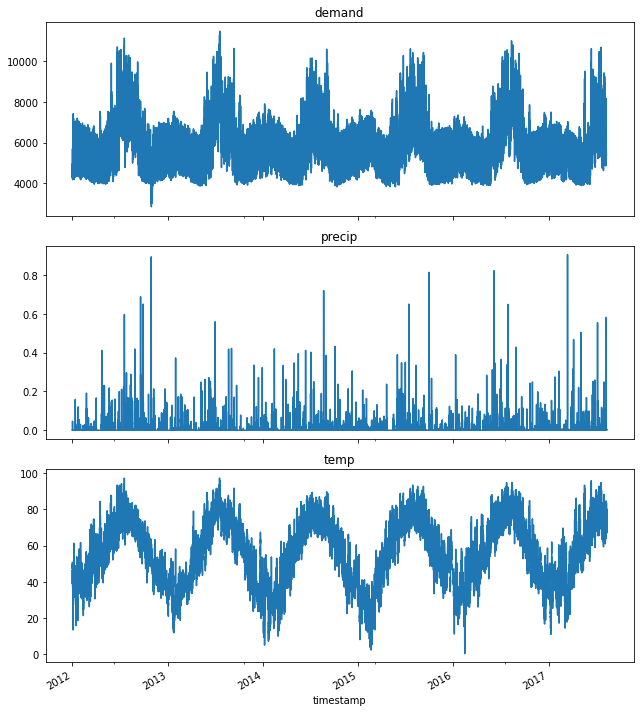

In [19]:
def dimensionality(saveto="03_multivariate_data.png"):
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(9,10))
    
    df = load_energy()
    for name, ax in zip(df.columns, axes):
        df[name].plot(ax=ax)
        ax.set_title(name)
        
        if ax != axes[-1]:
            ax.set_xlabel("")
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
dimensionality()

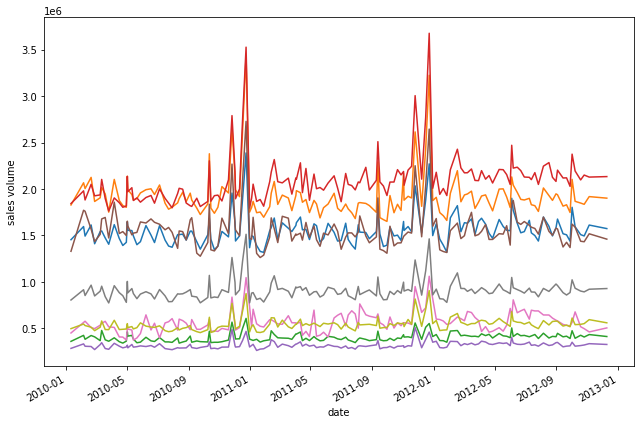

In [26]:
def related_independent(saveto="04_related_independent_data.png"):
    fig, ax = plt.subplots(figsize=(9,6))
    
    df = load_retail()
    for i in range(9):
        df[i+1].plot(ax=ax)

    ax.set_ylabel("sales volume")
        
    fig.tight_layout()
    plt.savefig(saveto)
    
    
related_independent()

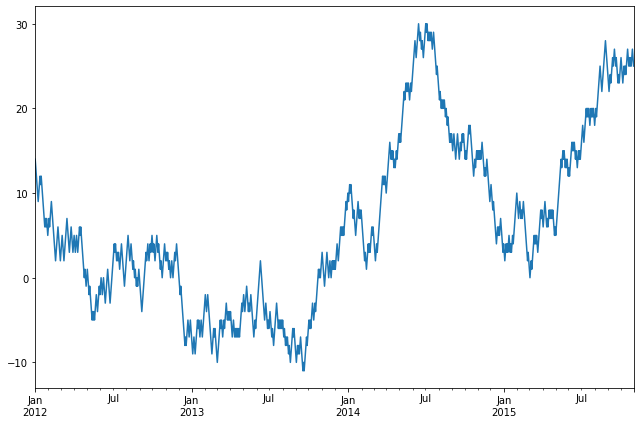

In [30]:
def random_walks(saveto="05_random_walk.png"):
    fig, ax = plt.subplots(figsize=(9,6))
    
    data = np.zeros(1000)
    data[0] = 14 if np.random.random() < 0.5 else 128
    for i in range(1, 1000):
        movement = -1 if np.random.random() < 0.5 else 1
        data[i] = data[i-1] + movement
    
    s = pd.Series(data, index=pd.date_range('2012-01-01', periods=1000, freq='B'))
    s.plot(ax=ax)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
random_walks()

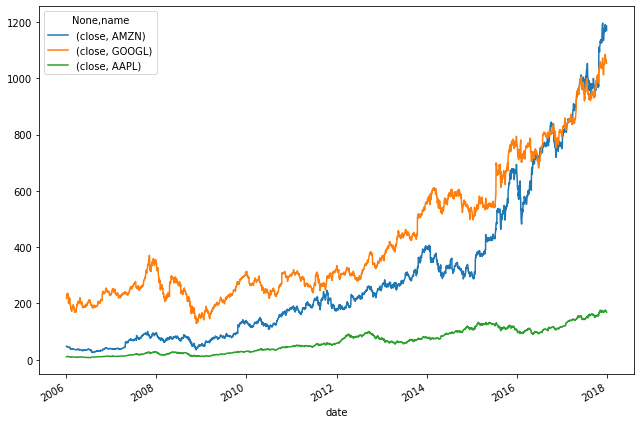

In [35]:
def random_walk_stocks(saveto="06_random_walk_stocks.png"):
    fig, ax = plt.subplots(figsize=(9,6))
    
    df = load_stocks()
    df.plot(ax=ax, y=[('close', "AMZN"), ('close', "GOOGL"), ('close', "AAPL")])
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
random_walk_stocks()

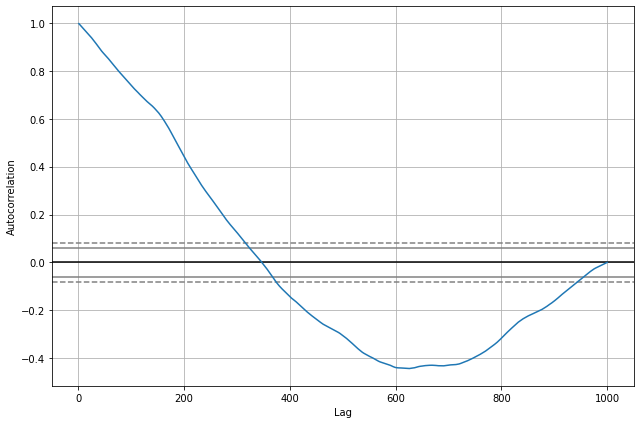

In [46]:
from pandas.plotting import autocorrelation_plot

def auto_correlation_plot(saveto="07_auto_correlation_plot.png"):
    fig, ax = plt.subplots(figsize=(9,6))
    
    df = load_stocks()
    goog = df[('close', "GOOGL")]
    goog.name = "GOOGL closing price"
    goog.reindex()
    
    data = np.zeros(1000)
    data[0] = 14 if np.random.random() < 0.5 else 128
    for i in range(1, 1000):
        movement = -1 if np.random.random() < 0.5 else 1
        data[i] = data[i-1] + movement
    
    s = pd.Series(data, index=pd.date_range('2012-01-01', periods=1000, freq='B'))
    autocorrelation_plot(s, ax=ax)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
auto_correlation_plot()

In [48]:
from statsmodels.tsa.stattools import adfuller

def adfuller_code():
    data = np.zeros(1000)
    data[0] = 14 if np.random.random() < 0.5 else 128
    for i in range(1, 1000):
        movement = -1 if np.random.random() < 0.5 else 1
        data[i] = data[i-1] + movement

    s = pd.Series(data, index=pd.date_range('2012-01-01', periods=1000, freq='B'))

    result = adfuller(s)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
        
adfuller_code()

ADF Statistic: -1.8039576343170156
p-value: 0.3784986158441774
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


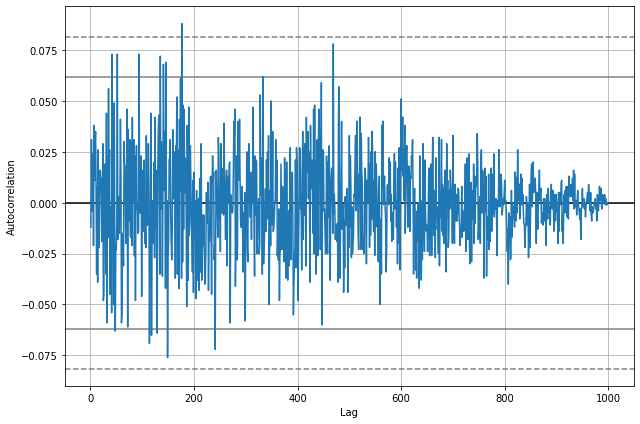

In [50]:
from pandas.plotting import autocorrelation_plot

def auto_correlation_stationary_plot(saveto="08_stationarity_random.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    data = np.zeros(1000)
    data[0] = 14 if np.random.random() < 0.5 else 128
    for i in range(1, 1000):
        movement = -1 if np.random.random() < 0.5 else 1
        data[i] = data[i-1] + movement
    
    stat = np.zeros(999)
    for i in range(1, 1000):
        stat[i-1] = data[i]-data[i-1]
    
    s = pd.Series(stat, index=pd.date_range('2012-01-01', periods=999, freq='B'))
    autocorrelation_plot(s, ax=ax)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
auto_correlation_stationary_plot()

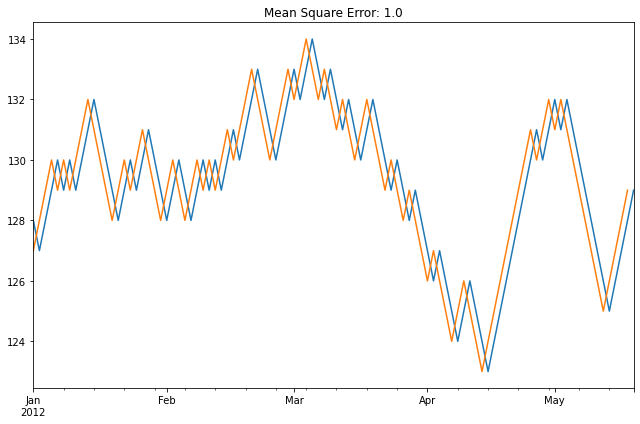

In [66]:
from sklearn.metrics import mean_squared_error


def persistence_model(saveto="09_persistence_model.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    data = np.zeros(100)
    data[0] = 14 if np.random.random() < 0.5 else 128
    for i in range(1, 100):
        movement = -1 if np.random.random() < 0.5 else 1
        data[i] = data[i-1] + movement
    
    s = pd.Series(data, index=pd.date_range('2012-01-01', periods=100, freq='B'), name="Actual")
    
    model = pd.Series(data[1:], index=s.index[0:-1])
    
    mse = mean_squared_error(s[:-1], model)
    
    s.plot(ax=ax)
    model.plot(ax=ax)
    
    ax.set_title(f"Mean Square Error: {mse}")
    fig.tight_layout()
    plt.savefig(saveto)
    
    
persistence_model()

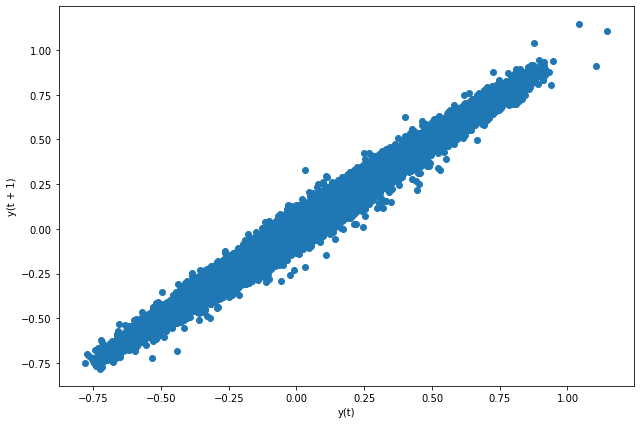

In [70]:
from pandas.plotting import lag_plot


def lag_plot_multi(saveto="10_lag_plot.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    df = load_ekg()
    s = df["ekg"]
    
    lag_plot(s, lag=1)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
lag_plot_multi()

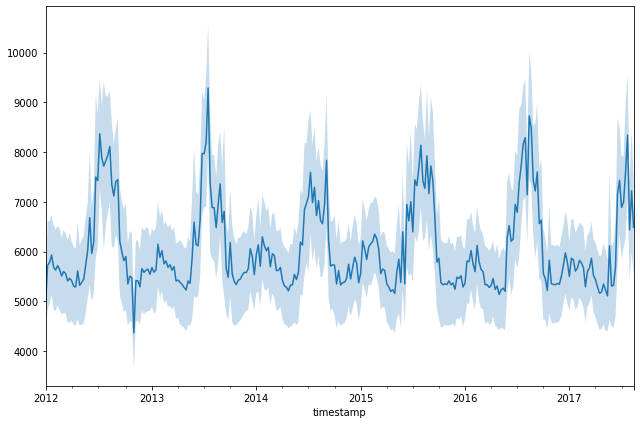

In [76]:
def windowed_aggregations(saveto="11_windowed_aggregations.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    df = load_energy()
    s = df["demand"]
    
    m = s.resample("W").mean()
    s = s.resample("W").std()
    
    m.plot(ax=ax)
    ax.fill_between(m.index, m-s, m+s, alpha=0.25)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
windowed_aggregations()

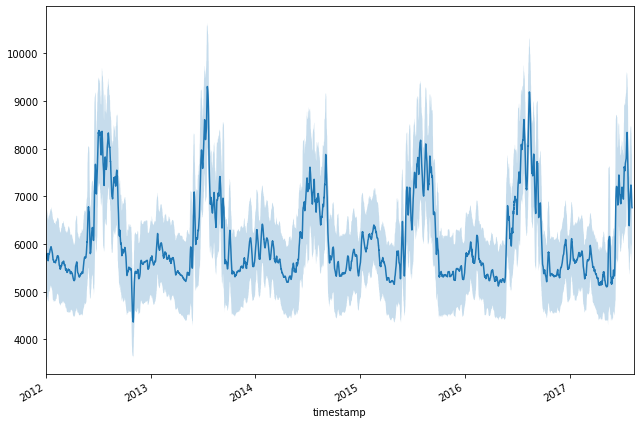

In [78]:
def rolling_windowed_aggregations(saveto="12_rolling_windowed_aggregations.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    df = load_energy()
    s = df["demand"]
    
    win = s.rolling(168, center=True)
    
    m = win.mean()
    s = win.std()
    
    m.plot(ax=ax)
    ax.fill_between(m.index, m-s, m+s, alpha=0.25)
    ax.set_xlim(m.index.min(), m.index.max())
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
rolling_windowed_aggregations()

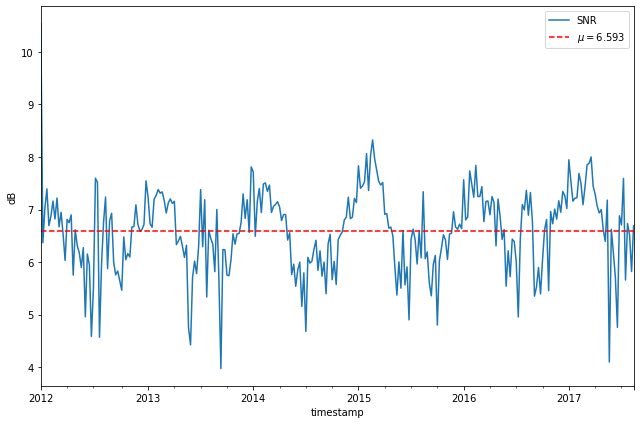

In [85]:
def signal_to_noise(saveto="13_signal_to_noise.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    df = load_energy()
    s = df["demand"]
    
    m = s.resample("W").mean()
    s = s.resample("W").std()
    snr = m/s
    snr.name = "SNR"
    
    snr.plot(ax=ax)
    ax.set_ylabel("dB")
    ax.axhline(snr.mean(), linestyle="--", c='r', label=f"$\mu={snr.mean():0.3f}$")
    ax.legend()
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
signal_to_noise()

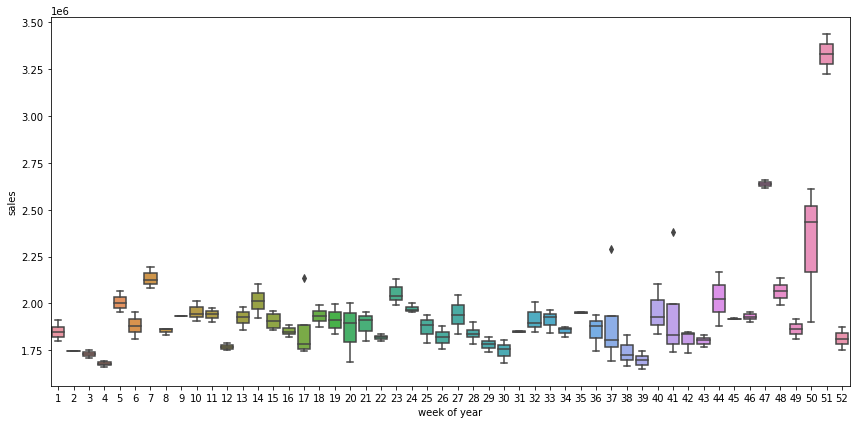

In [101]:
def seasonality(saveto="14_seasonality.png"):
    fig, ax = plt.subplots(figsize=(12,6))
     
    df = load_retail()
    df = df.sum(axis=1, level='store')
    
    df["week"] = df.index.isocalendar().week

    sns.boxplot(data=df, x="week", y=2)
    ax.set_ylabel("sales")
    ax.set_xlabel("week of year")
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
seasonality()

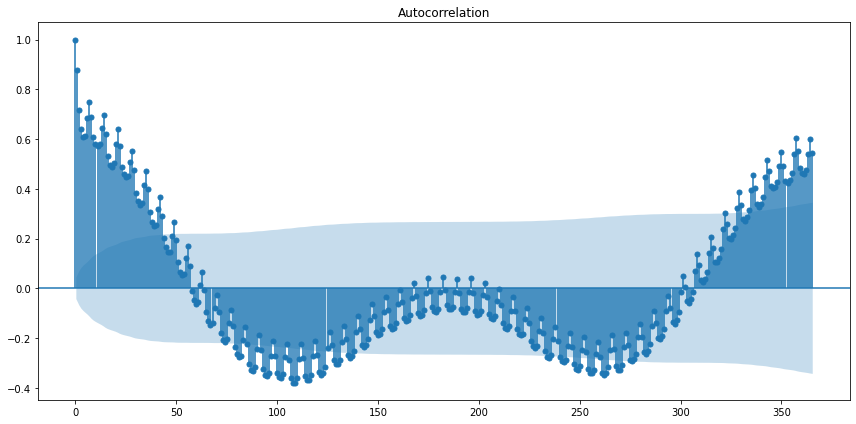

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

def autocorrelation_revisited(saveto="15_autocorrelation_revisited.png"):
    fig, ax = plt.subplots(figsize=(12,6))
     
    dta = load_energy()['demand'].resample('D').mean().dropna()
    sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=365, ax=ax)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
autocorrelation_revisited()

/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


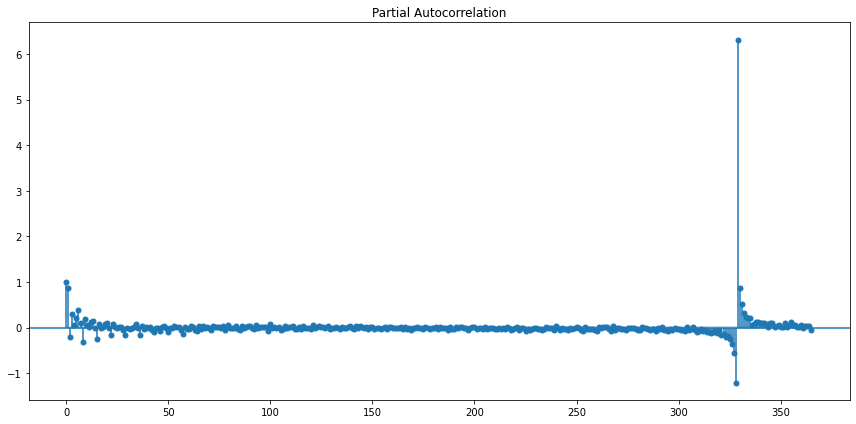

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

def partial_autocorrelation(saveto="16_partial_autocorrelation.png"):
    fig, ax = plt.subplots(figsize=(12,6))
     
    dta = load_energy()['demand'].resample('D').mean().dropna()
    sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=365, ax=ax)
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
partial_autocorrelation()

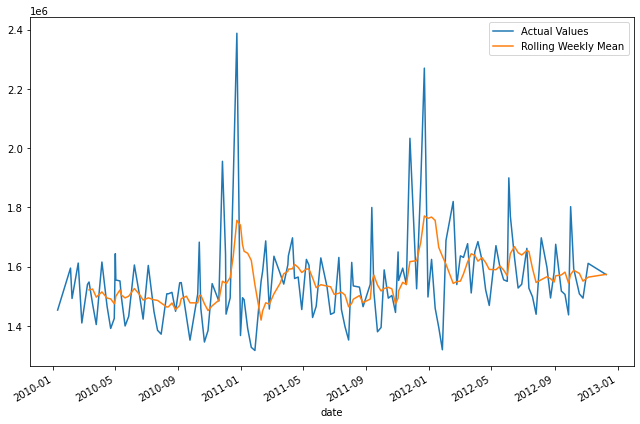

In [37]:
def moving_average(saveto="17_moving_average.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    s = load_retail()[1]
    s.name = "Actual Values"
    s.plot(ax=ax)
    
    s.rolling(window=7).mean().plot(ax=ax, label="Rolling Weekly Mean")
    
    ax.legend()
    fig.tight_layout()
    plt.savefig(saveto)
    
    
moving_average()

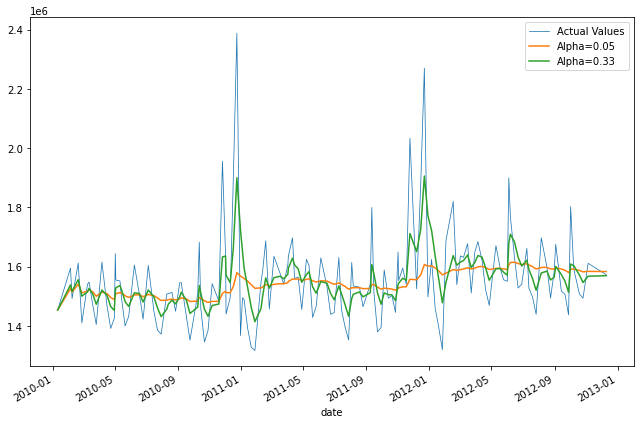

In [45]:
def exponential_smoothing(saveto="18_exponential_smoothing.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    s = load_retail()[1]
    s.name = "Actual Values"
    s.plot(ax=ax, linewidth=0.75)
    
    
    s.ewm(alpha=0.05).mean().plot(ax=ax, label="Alpha=0.05")
    s.ewm(alpha=0.33).mean().plot(ax=ax, label="Alpha=0.33")
    
    ax.legend()
    fig.tight_layout()
    plt.savefig(saveto)
    
    
exponential_smoothing()

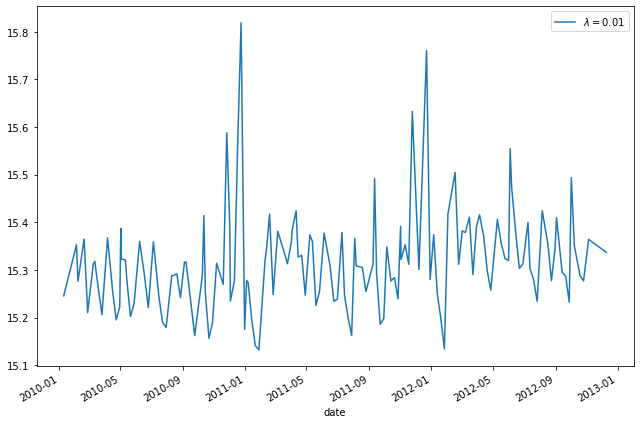

In [73]:
from scipy.stats import boxcox

def boxcox_smoothing(saveto="19_boxcox_smoothing.png"):
    fig, ax = plt.subplots(figsize=(9,6))
     
    s = load_retail()[1]  
    b= boxcox(s.values, lmbda=0.01)
    pd.Series(b, index=s.index, name=f"$\lambda=0.01$").plot(ax=ax)
    
    ax.legend()
    fig.tight_layout()
    plt.savefig(saveto)
    
    
boxcox_smoothing()

/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/

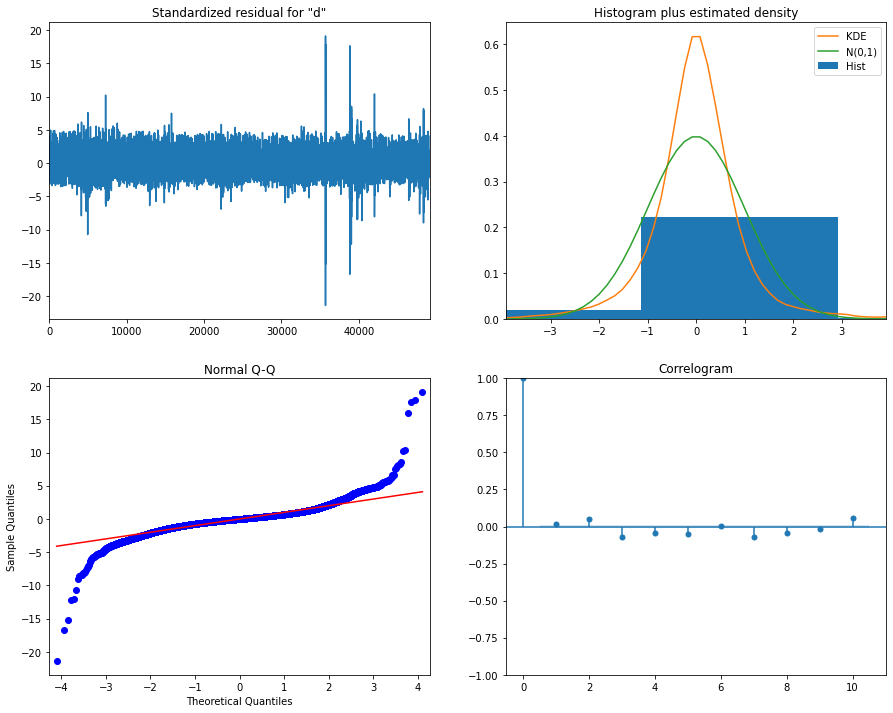

In [77]:
import statsmodels as sm

def arima(saveto="20_arima.png"):
    demand = load_energy()['demand']

    mod = sm.tsa.statespace.sarimax.SARIMAX(demand,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    results.plot_diagnostics(figsize=(15,12))
    
    plt.savefig(saveto)
    
    
arima()

/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/benjamin/Workspace/georgetown/time-series-analytics/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


timestamp
2012-01-01 00:00:00   NaN
2012-01-01 01:00:00   NaN
2012-01-01 02:00:00   NaN
2012-01-01 03:00:00   NaN
2012-01-01 04:00:00   NaN
                       ..
2017-08-10 01:00:00   NaN
2017-08-10 02:00:00   NaN
2017-08-10 03:00:00   NaN
2017-08-10 04:00:00   NaN
2017-08-10 05:00:00   NaN
Name: predictions, Length: 49124, dtype: float64


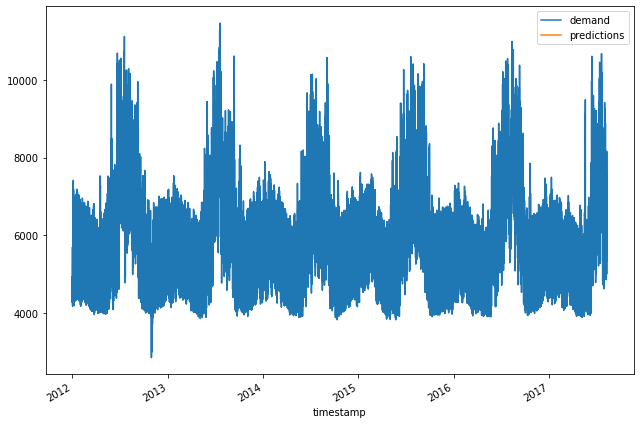

In [103]:
import statsmodels as sm

def holtwinters(saveto="21_holtwinters.png"):
    demand = load_energy()['demand']
    demand.dropna(inplace=True)

    mod = sm.tsa.holtwinters.ExponentialSmoothing(
        demand,
        seasonal_periods=4,
    )
    results = mod.fit()
    results.summary()
    
    yhat = results.predict()
    yhat = pd.Series(yhat, index=demand.index, name="predictions")
    print(yhat)

    fig, ax = plt.subplots(figsize=(9,6))
    demand.plot(ax=ax)
    yhat.plot(ax=ax)
    
    ax.legend()
    fig.tight_layout()
    plt.savefig(saveto)
    
    
holtwinters()

In [ ]:
def f(saveto="03_.png"):
    fig, ax = plt.subplots(figsize=(9,6))
    
    df = load_energy()
    
    
    fig.tight_layout()
    plt.savefig(saveto)
    
    
f()